# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [5]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [6]:
df = df.drop_duplicates()

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

Type Markdown and LaTeX:  𝛼2

Outlier Correction

In [8]:
# We need to treat Outliers in our data before further proceeding,to perform outlier correction I am going to use IQR approach
# num_passengers
q3 = df.num_passengers.quantile(0.75)
q1 = df.num_passengers.quantile(0.25)
IQR = q3 - q1
upper_threshold = q3 + (1.5*IQR)
lower_threshold = q1 - (1.5*IQR)
upper_threshold,lower_threshold
df.num_passengers = df.num_passengers.clip(lower_threshold,upper_threshold)

In [9]:
#purchase_lead
q3 = df.purchase_lead.quantile(0.75)
q1 = df.purchase_lead.quantile(0.25)
IQR = q3 - q1
upper_threshold = q3 + (1.5*IQR)
lower_threshold = q1 - (1.5*IQR)
upper_threshold,lower_threshold
df.purchase_lead = df.purchase_lead.clip(lower_threshold,upper_threshold)

In [10]:
# length_of_stay
q3 = df.length_of_stay.quantile(0.75)
q1 = df.length_of_stay.quantile(0.25)
IQR = q3 - q1
upper_threshold = q3 + (1.5*IQR)
lower_threshold = q1 - (1.5*IQR)
upper_threshold,lower_threshold
df.length_of_stay = df.length_of_stay.clip(lower_threshold,upper_threshold)

In [11]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.518668,79.774233,19.371624,9.070676,0.668229,0.295631,0.426635,7.279974,0.149977
std,0.763917,76.806868,18.317244,5.413099,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,3.500000,256.000000,62.500000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


### Exploratory Data Analysis

# We are exploring each feature towards the target feature.

-The input Features are :
    - num_passengers
    - sales_channel
    - trip_type
    - flight_day
    - wants_extra_baggage
    - wants_preferred_seat
    - wants_in_flight_meals
    - flight_duration

- The Output Feature is:
    
    - booking_complete
    
    


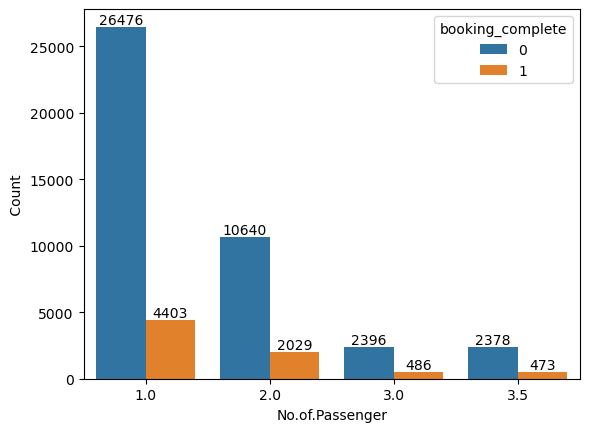

In [12]:
data =sns.countplot(x=df['num_passengers'],hue = df['booking_complete'],data=df)
for label in data.containers:
    data.bar_label(label)
plt.xlabel("No.of.Passenger")
plt.ylabel(" Count ")
plt.show()

The above graph says that the ticket booking is mostly contributed by single passengers and then so on.

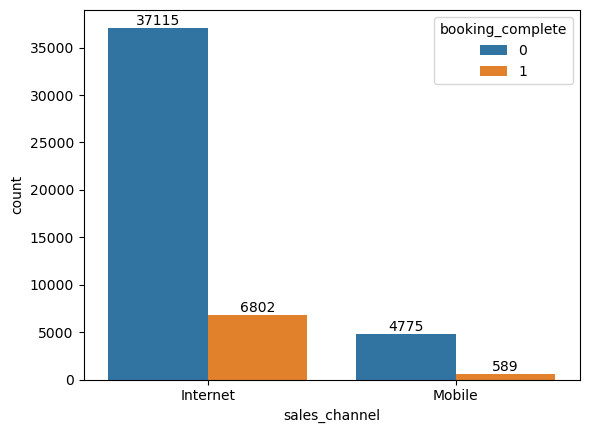

In [13]:
data = sns.countplot(x=df['sales_channel'],hue = df['booking_complete'],data=df)
for label in data.containers:
    data.bar_label(label)
plt.show()

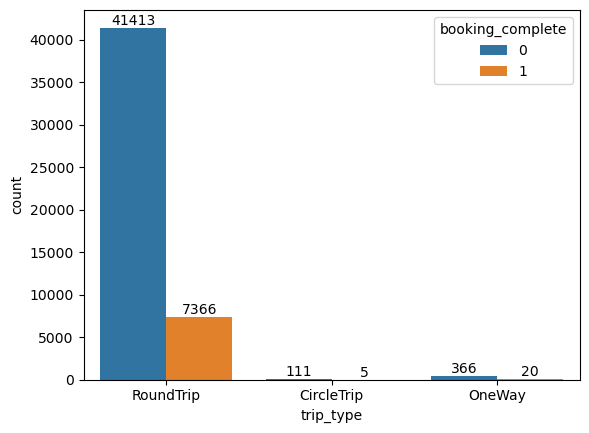

In [14]:
data = sns.countplot(x=df['trip_type'],hue = df['booking_complete'],data=df)
for label in data.containers:
    data.bar_label(label)
plt.show()

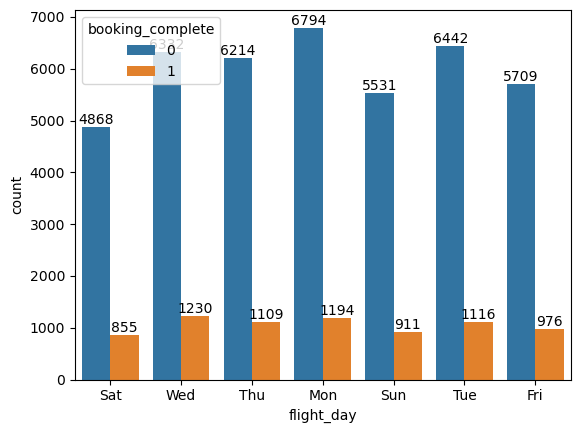

In [15]:
data = sns.countplot(x=df['flight_day'],hue = df['booking_complete'],data=df)
for label in data.containers:
    data.bar_label(label)
plt.show()

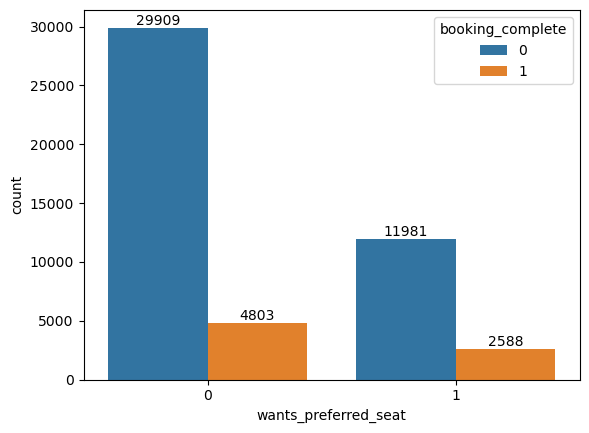

In [16]:
data = sns.countplot(x=df['wants_preferred_seat'],hue = df['booking_complete'],data=df)
for label in data.containers:
    data.bar_label(label)
plt.show()

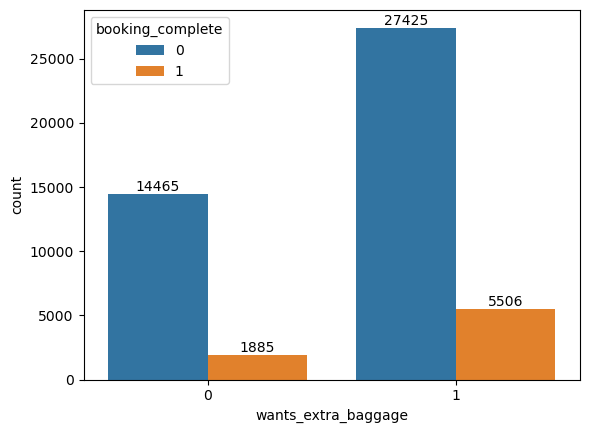

In [17]:
data = sns.countplot(x=df['wants_extra_baggage'],hue = df['booking_complete'],data=df)
for label in data.containers:
    data.bar_label(label)
plt.show()

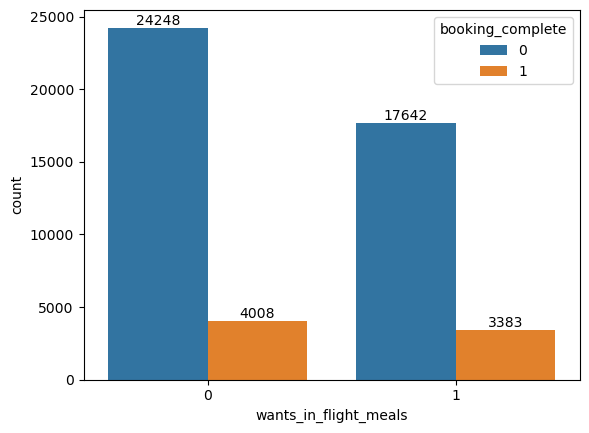

In [18]:
data = sns.countplot(x=df['wants_in_flight_meals'],hue = df['booking_complete'],data=df)
for label in data.containers:
    data.bar_label(label)
plt.show()

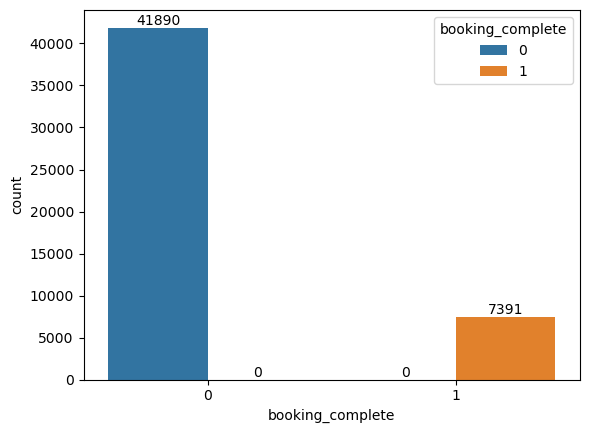

In [19]:
data = sns.countplot(x=df['booking_complete'],hue = df['booking_complete'],data=df)
for label in data.containers:
    data.bar_label(label)
plt.show()

## Encoding

In [20]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [21]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [22]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [23]:
df['num_passengers'].unique(),df['num_passengers'].nunique()

(array([2. , 1. , 3. , 3.5]), 4)

In [24]:
df['sales_channel'].value_counts()

Internet    43917
Mobile       5364
Name: sales_channel, dtype: int64

In [25]:
df['sales_channel'] = df['sales_channel'].map({'Internet':1,'Mobile':0})

In [26]:
df['sales_channel'].value_counts()

1    43917
0     5364
Name: sales_channel, dtype: int64

In [27]:
df['trip_type'].value_counts()

RoundTrip     48779
OneWay          386
CircleTrip      116
Name: trip_type, dtype: int64

In [28]:
# df['trip_type'] = df['trip_type'].map({"RoundTrip":2,"OneWay":1,"CircleTrip":0})
data = pd.get_dummies(df['trip_type'],prefix='trip',drop_first=True)

In [29]:
data

,trip_OneWay,trip_RoundTrip
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
49995,0,1
49996,0,1
49997,0,1
49998,0,1


In [30]:
df = pd.concat([df,data],axis=1)

In [31]:
df = df.drop('trip_type',axis=1)

In [32]:
df = df.reindex(columns=['num_passengers','sales_channel','trip_OneWay','trip_RoundTrip','purchase_lead','length_of_stay','flight_hour','flight_day','route','booking_origin','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','flight_duration','booking_complete'])

In [33]:
df

,num_passengers,sales_channel,trip_OneWay,trip_RoundTrip,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2.0,1,0,1,256.0,19.0,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1.0,1,0,1,112.0,20.0,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2.0,1,0,1,243.0,22.0,17,3,AKLDEL,India,1,1,0,5.52,0
3,1.0,1,0,1,96.0,31.0,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2.0,1,0,1,68.0,22.0,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2.0,1,0,1,27.0,6.0,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1.0,1,0,1,111.0,6.0,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1.0,1,0,1,24.0,6.0,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1.0,1,0,1,15.0,6.0,11,1,PERPNH,Australia,1,0,1,5.62,0


In [34]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['route'] = lb.fit_transform(df['route'])

In [35]:
df['route'].nunique()

799

In [36]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['booking_origin'] = lb.fit_transform(df['booking_origin'])

In [37]:
df['booking_origin'].nunique()

104

In [38]:
df

,num_passengers,sales_channel,trip_OneWay,trip_RoundTrip,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2.0,1,0,1,256.0,19.0,7,6,0,61,1,0,0,5.52,0
1,1.0,1,0,1,112.0,20.0,3,6,0,61,0,0,0,5.52,0
2,2.0,1,0,1,243.0,22.0,17,3,0,36,1,1,0,5.52,0
3,1.0,1,0,1,96.0,31.0,4,6,0,61,0,0,1,5.52,0
4,2.0,1,0,1,68.0,22.0,15,3,0,36,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2.0,1,0,1,27.0,6.0,9,6,720,4,1,0,1,5.62,0
49996,1.0,1,0,1,111.0,6.0,4,7,720,4,0,0,0,5.62,0
49997,1.0,1,0,1,24.0,6.0,22,6,720,4,0,0,1,5.62,0
49998,1.0,1,0,1,15.0,6.0,11,1,720,4,1,0,1,5.62,0


Split the data into two parts as 'X' which represents Features and 'y' represents target

In [39]:
X = df.loc[:,df.columns[:14]]
y = df['booking_complete']

In [40]:
df['booking_complete'].value_counts(normalize=True)

0    0.850023
1    0.149977
Name: booking_complete, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=df.booking_complete)

In [46]:
from collections import Counter

Counter(y_train)

Counter({0: 33511, 1: 5913})

In [47]:
from imblearn.combine import SMOTEENN
from collections import Counter

smot = SMOTEENN(random_state=42)
x_train_smot,y_train_smot = smot.fit_resample(x_train,y_train)

In [48]:
Counter(y_train_smot)

Counter({0: 20162, 1: 28437})

In [49]:
# depth =18 having better F1_score

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import cross_validate

for depth in range(2,5):
    rfc = RandomForestClassifier(max_depth=depth)
    rfc.fit(x_train_smot,y_train_smot)
    y_pred = rfc.predict(x_test)
    cv = cross_validate(rfc,x_train_smot,y_train_smot,cv=10)
    print(f"Depth : {depth} || Accuracy :{accuracy_score(y_pred,y_test)}|| F1_Score :{f1_score(y_pred,y_test)}|| cross val score:{np.mean(cv['test_score'])}")
   

Depth : 2 || Accuracy :0.47194886882418585|| F1_Score :0.3324355521354367|| cross val score:0.7542131101168168
Depth : 3 || Accuracy :0.48939839707821853|| F1_Score :0.33557755775577564|| cross val score:0.7596864881849218
Depth : 4 || Accuracy :0.5117175611240743|| F1_Score :0.3384192439862543|| cross val score:0.7689871707247253


### GridSearchCV on Decision Trees

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entrophy'],
             'max_depth':range(2,21),
             'min_samples_split':range(2,21)}

grid = GridSearchCV(rfc,param_grid,cv=5,scoring='accuracy',return_train_score=False,verbose=1)

grid_search=grid.fit(x_train_smot,y_train_smot)

In [ ]:
grid_search.best_params_ 

In [ ]:
grid_search.best_score_

In [445]:
fimp = pd.Series(rfc.feature_importances_, index = x_train.columns)
fimp.sort_values(ascending=False)

booking_origin           0.260097
route                    0.140684
length_of_stay           0.113269
flight_duration          0.108530
purchase_lead            0.102042
num_passengers           0.100814
flight_hour              0.066775
flight_day               0.053750
wants_in_flight_meals    0.018304
wants_extra_baggage      0.012139
wants_preferred_seat     0.011846
sales_channel            0.009050
trip_RoundTrip           0.001535
trip_OneWay              0.001165
dtype: float64

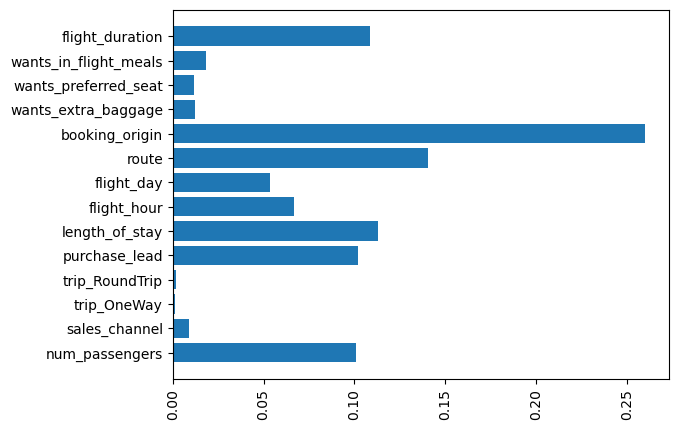

In [450]:
plt.barh(x_train.columns, rfc.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [440]:
import xgboost as xgb


for lr in range(1,20):
    xg = xgb.XGBClassifier(learning_rate=lr)
    xg.fit(x_train_smot,y_train_smot)
    xpred = xg.predict(x_test)
    cv = cross_validate(xg,x_train_smot,y_train_smot,cv=10)
    print(f"Depth : {lr} || Accuracy :{accuracy_score(xpred,y_test)}|| F1_Score :{f1_score(xpred,y_test)}|| cross val score:{np.mean(cv['test_score'])}")
   

Depth : 1 || Accuracy :0.7516485746170234|| F1_Score :0.3839959738298943|| cross val score:0.9258453246965764
Depth : 2 || Accuracy :0.6500963782083798|| F1_Score :0.2731296101159115|| cross val score:0.6136134541289181
Depth : 3 || Accuracy :0.5471238713604545|| F1_Score :0.3188892279523955|| cross val score:0.6163127296529358
Depth : 4 || Accuracy :0.6096175306888506|| F1_Score :0.29832239241429614|| cross val score:0.6128330432454143
Depth : 5 || Accuracy :0.6904737749822462|| F1_Score :0.23858248065884702|| cross val score:0.6516708851613122
Depth : 6 || Accuracy :0.6265598052145683|| F1_Score :0.2800704087619793|| cross val score:0.6585956939476821
Depth : 7 || Accuracy :0.5669067667647357|| F1_Score :0.33014278989486895|| cross val score:0.71915413763131
Depth : 8 || Accuracy :0.513645125291671|| F1_Score :0.32800672834314554|| cross val score:0.7003282307612204
Depth : 9 || Accuracy :0.17195901389875215|| F1_Score :0.25948103792415167|| cross val score:0.6795236522600293
Depth :

In [ ]:
fimp = pd.Series(xg.feature_importances_, index = x_train.columns)
fimp.sort_values(ascending=False)